In [44]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import numpy as np
import scipy as sp
import scipy.stats as stats
import nibabel as nibabel
import pandas as pd
import nibabel.freesurfer.mghformat as mgh
import scipy.io
import itertools 
import pickle
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
import seaborn as sns
import matplotlib.font_manager

In [2]:
import sys
utils_dir = '/oak/stanford/groups/kalanit/biac2/kgs/projects/Dawn/NSD/code/streams/utils/'
sys.path.append(utils_dir)

In [3]:
from rsm_utils import get_flat_lower_tri, make_flat_rsms

In [4]:
data_dir = '../../../data/'
local_data_dir = '../../../local_data/'

subjid = ['01', '02', '03', '04', '05', '06', '07', '08']
ROI_names = ['Unknown', 'Early', 'Midventral', 'Midlateral', 'Midparietal', 'Ventral', 'Lateral', 'Parietal']
n_repeats = 3

#threshold for voxels (based on split-half reliability)
thresh = .2

hemis = ['lh', 'rh']

In [5]:
with open(local_data_dir + 'processed/rh_mega_matrix.data', 'rb') as filehandle:
    # read the data as binary data stream
    mega_matrix = pickle.load(filehandle)

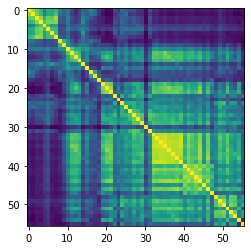

In [6]:
plt.imshow(mega_matrix[0]) #just checking

In [7]:
sym_mm = np.around(mega_matrix[0], decimals = 5)

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from scipy.spatial.distance import squareform


In [9]:
dists = squareform(1-sym_mm)

In [30]:
linkage_matrix = linkage(dists, "complete", optimal_ordering=True)


In [31]:
linkage_matrix.shape

(55, 4)

In [32]:
ls = ['Early_S1','Early_S2', 'Early_S3', 'Early_S4', 'Early_S5','Early_S6', 'Early_S7', 'Early_S8', 
      'mV_S1', 'mV_S2', 'mV_S3', 'mV_S4', 'mV_S5', 'mV_S6', 'mV_S7', 'mV_S8', 
      'mL_S1', 'mL_S2', 'mL_S3', 'mL_S4', 'mL_S5', 'mL_S6', 'mL_S7', 'mL_S8',
      'mP_S1', 'mP_S2', 'mP_S3', 'mP_S4', 'mP_S5', 'mP_S6', 'mP_S7', 'mP_S8',
      'Ventral_S1', 'Ventral_S2','Ventral_S3', 'Ventral_S4','Ventral_S5', 'Ventral_S6','Ventral_S7', 'Ventral_S8',
      'Lateral_S1', 'Lateral_S2','Lateral_S3', 'Lateral_S4','Lateral_S5', 'Lateral_S6','Lateral_S7', 'Lateral_S8',
      'Parietal_S1','Parietal_S2','Parietal_S3','Parietal_S4','Parietal_S5','Parietal_S6','Parietal_S7','Parietal_S8']


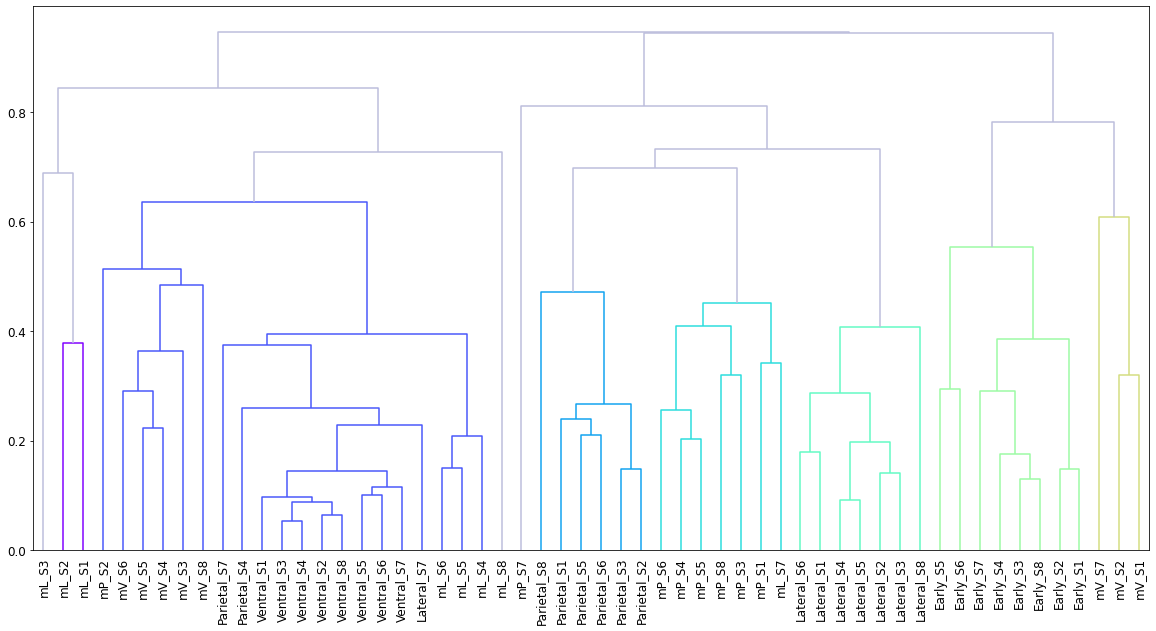

In [45]:
plt.figure(figsize=(20,10))
cmap = plt.cm.rainbow(np.linspace(0, 1, 10))
set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

dn = dendrogram(linkage_matrix, labels = ls,
                above_threshold_color='#bcbddc',
                leaf_rotation=90.,
                leaf_font_size=12.)  
plt.gca().yaxis.set_tick_params(labelsize='large')


In [29]:
linkage_matrix.shape[0] + 1

56

In [15]:
len(ls)

56